# Mohd Azri bin Mohd Ridzuan Nyanged
#### Talentlabs-MyMahir CADA Programme
#### EDA Project - Home Credit Loan Risk Analysis

# Background

Financial institutions face a critical challenge in distinguishing between applicants who are likely to repay their loans and those at risk of default. Incorrectly approving high-risk clients can lead to financial losses, while rejecting creditworthy applicants reduces potential revenue and customer trust.

This project explores Home Credit loan application data through Exploratory Data Analysis (EDA) to identify the key factors that influence loan repayment difficulties. The dataset includes client demographic, financial, and historical application information, allowing for a comprehensive view of the drivers behind loan default risk.

By analyzing patterns in client characteristics, financial ratios, and historical borrowing behavior, this EDA aims to:

- Understand the demographic and socioeconomic factors contributing to repayment difficulties.  
- Identify financial stress indicators, such as income-to-loan ratios, that correlate with default risk.  
- Assess the impact of past loan behavior (e.g., approvals, refusals, cancellations) on current repayment outcomes.  
- Provide data-driven insights to guide future risk assessment models and more effective lending strategies.


# Data Inspection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
curr = pd.read_csv("/content/drive/MyDrive/EDA+Project/Project Dataset (Option 1)/application_data.csv")
prev = pd.read_csv("/content/drive/MyDrive/EDA+Project/Project Dataset (Option 1)/previous_application.csv")
desc = pd.read_csv("/content/drive/MyDrive/EDA+Project/Project Dataset (Option 1)/columns_description.csv", encoding='latin1')

In [ ]:
pd.set_option('display.max_info_columns', 200) # Set a value larger than the number of columns
curr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [ ]:
curr.shape

(307511, 122)

In [ ]:
curr.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
curr.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning

In this data cleaning section, I will focus on column dropping since the dataset contains a large number of variables, many of which are either redundant, highly missing, or irrelevant to the current business objective. The goal is to retain only meaningful and interpretable features that can help identify factors influencing loan default.

In [ ]:
# Finding out columns with the highest null values

curr_null = curr.isnull().sum().sort_values(ascending=False)
curr_null_percentage = curr_null/len(curr)*100
curr_null_percentage_sorted = curr_null_percentage.sort_values(ascending=False)
curr_column_nulls = pd.concat([curr_null, curr_null_percentage_sorted], axis=1, keys=['Total', 'Percentage'])
high_null_cols = curr_column_nulls[curr_column_nulls['Percentage'] >= 40]
display(high_null_cols)

,Total,Percentage
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


In [ ]:
# Checking if dwelling conditions correlate with loan default ('Target' column)

## Identify normalized building-related columns
normalized_cols_numeric = [col for col in curr.columns if any(
    x in col for x in [
        'APARTMENTS', 'LIVING', 'NONLIVING', 'COMMONAREA',
        'ELEVATORS', 'FLOORS', 'ENTRANCES', 'YEARS_BUILD', 'FLOORSMAX',
        'FLOORSMIN', 'LANDAREA', 'LIVINGAPARTMENTS', 'LIVINGAREA',
        'NONLIVINGAPARTMENTS', 'NONLIVINGAREA'
    ]) and any(col.endswith(suffix) for suffix in ['_AVG', '_MEDI'])
]

## Calculate correlations with TARGET
corrs = curr[normalized_cols_numeric + ['TARGET']].corr()['TARGET'].sort_values(ascending=False)

## Show only non-null correlations
corrs.dropna()

,TARGET
TARGET,1.000000
NONLIVINGAPARTMENTS_MEDI,-0.002757
NONLIVINGAPARTMENTS_AVG,-0.003176
LANDAREA_AVG,-0.010885
LANDAREA_MEDI,-0.011256
NONLIVINGAREA_MEDI,-0.013337
NONLIVINGAREA_AVG,-0.013578
COMMONAREA_AVG,-0.018550
COMMONAREA_MEDI,-0.018573
ENTRANCES_MEDI,-0.019025


All numeric normalized columns show very little correlation with 'TARGET'
Hence, we will delete these columns.
We will also drop all dwellings-related columns including non-numerical ones.

In [ ]:
normalized_cols = [col for col in curr.columns if any(
    col.endswith(suffix) for suffix in ['_AVG', '_MODE', '_MEDI'])
]

curr = curr.drop(normalized_cols, axis=1)

Next, we'll see if these flag columns correlate with 'TARGET'

In [ ]:
flag_cols = [col for col in curr.columns if col.startswith('FLAG')]
flag_numeric = [col for col in flag_cols if curr[col].dtype == 'int']

# Calculate correlations with TARGET
corrs_flag = curr[flag_numeric + ['TARGET']].corr()['TARGET'].sort_values(ascending=False)

# Show only non-null correlations
corrs_flag.dropna()

,TARGET
TARGET,1.000000
FLAG_EMP_PHONE,0.045982
FLAG_DOCUMENT_3,0.044346
FLAG_WORK_PHONE,0.028524
FLAG_DOCUMENT_2,0.005417
FLAG_DOCUMENT_21,0.003709
FLAG_MOBIL,0.000534
FLAG_CONT_MOBILE,0.000370
FLAG_DOCUMENT_20,0.000215
FLAG_DOCUMENT_5,-0.000316


All flag columns show very weak linear relationship, hence we can drop these columns.

In [ ]:
curr = curr.drop(flag_cols, axis=1)

In [ ]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   AMT_GOODS_PRICE              307233 non-null  float64
 9   NAME_TYPE_SUITE              306219 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

For the last data cleaning step, I would like to reformat DAYS_BIRTH and DAYS_EMPLOYED columns, since the values are negative (counted backwards from the day of application)

In [ ]:
days_birth_new = curr['DAYS_BIRTH'].abs()
days_employed_new = curr['DAYS_EMPLOYED'].abs()
curr['days_birth_new'] = days_birth_new
curr['days_employed_new'] = days_employed_new

In [ ]:
# I also found that in 'DAYS_EMPLOYED', some recorded a value of over 300,000 days which equates to more than 1000 years of working.
# However, this number is only used as a placeholder for unemployed clients. Thus, I'll replace it with NaN.

curr['days_employed_new']  = curr['days_employed_new'] .replace(365243, np.nan)

# Exploratory Data Analysis

##Outlier Analysis

First, I checked for outliers in the numerical columns. To identify outliers, the Interquartile Range (IQR) method was used, where any value beyond 1.5 × IQR from the first or third quartile was considered a potential outlier.

Before applying this method, categorical and boolean columns that were stored as numeric values (for example, regional ratings, binary flags, and encoded categories) were excluded from the analysis, since the IQR approach is only meaningful for continuous numerical data. Applying it to discrete or encoded categories could yield misleading results.

The outlier analysis for columns such as REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY was therefore ignored, as these represent ordinal categories (1–3) rather than continuous variables. Only truly continuous numerical columns, such as income, credit amount, annuity, and duration-related variables, were retained for valid outlier detection.

In [ ]:
# 1. Select numeric columns
num_cols = curr.select_dtypes(include=[np.number]).columns.tolist()

# 2. Calculate unique counts for each numeric column
unique_counts = curr[num_cols].nunique().sort_values()

# 3. Define a threshold for "true numeric"
# Anything with <= 3 unique values is likely categorical or boolean
true_numerical = [col for col in num_cols if curr[col].nunique() > 3]

# 4. Inspect which ones were excluded
excluded = [col for col in num_cols if col not in true_numerical]

print("✅ True Numerical Columns:")
print(true_numerical)

print("\n⚙️ Excluded Columns (likely categorical or boolean):")
print(excluded)

✅ True Numerical Columns:
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'days_birth_new', 'days_employed_new']

⚙️ Excluded Columns (likely categorical or boolean):
['TARGET', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']


In [ ]:
# Outlier analysis

outlier_report = []
for col in true_numerical:
    s = curr[col].dropna()
    if s.empty:
        continue
    q1 = s.quantile(0.25); q3 = s.quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    outliers = ((s < lb) | (s > ub)).sum()
    outlier_pct = outliers / len(curr) * 100
    outlier_report.append((col, s.min(), s.max(), q1, q3, iqr, lb, ub, outliers, outlier_pct))

outlier_df = pd.DataFrame(outlier_report, columns=['col','min','max','q1','q3','iqr','lower','upper','outlier_count','outlier_pct'])
outlier_df = outlier_df.sort_values('outlier_pct', ascending=False)
display(outlier_df.head(46))

,col,min,max,q1,q3,iqr,lower,upper,outlier_count,outlier_pct
8,DAYS_EMPLOYED,-17912,365243,-2760,-289,2471,-6466,3418,72217,23
26,AMT_REQ_CREDIT_BUREAU_QRT,0,261,0,0,0,0,0,50575,16
25,AMT_REQ_CREDIT_BUREAU_MON,0,27,0,0,0,0,0,43759,14
18,DEF_30_CNT_SOCIAL_CIRCLE,0,34,0,0,0,0,0,35166,11
20,DEF_60_CNT_SOCIAL_CIRCLE,0,24,0,0,0,0,0,25769,8
17,OBS_30_CNT_SOCIAL_CIRCLE,0,348,0,2,2,-3,5,19971,6
19,OBS_60_CNT_SOCIAL_CIRCLE,0,344,0,2,2,-3,5,19564,6
29,days_employed_new,0,17912,767,3175,2408,-2845,6787,15149,5
5,AMT_GOODS_PRICE,40500,4050000,238500,679500,441000,-423000,1341000,14728,5
2,AMT_INCOME_TOTAL,25650,117000000,112500,202500,90000,-22500,337500,14035,5


## Loan Default Analysis

For this part of EDA, we will look at distribution of client profile, categorical analysis, ratio analysis and last but not least, the previous loan application pattern to derive general insights on what do clients with payment difficulties have in common.


Absolute Counts:
No Payment Difficulties (0): 282,686
Payment Difficulties (1): 24,825

Percentages:
No Payment Difficulties (0): 91.93%
Payment Difficulties (1): 8.07%

Imbalance Ratio: 11.39:1


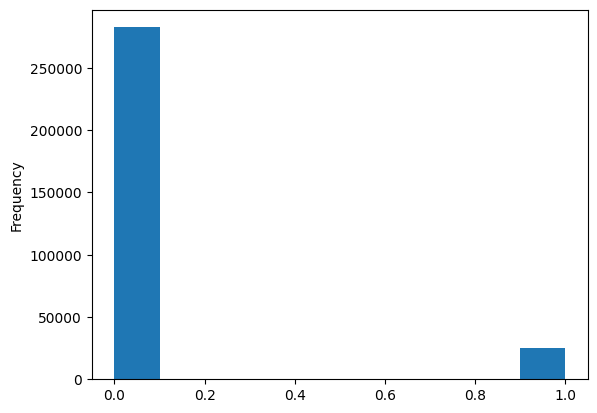

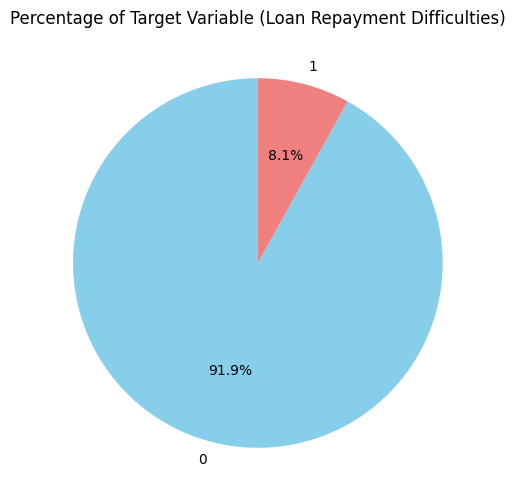

In [ ]:
# Let's start observing 'TARGET' column

target_counts = curr['TARGET'].value_counts()
target_pct = curr['TARGET'].value_counts(normalize=True) * 100

print("\nAbsolute Counts:")
print(f"No Payment Difficulties (0): {target_counts[0]:,}")
print(f"Payment Difficulties (1): {target_counts[1]:,}")
print(f"\nPercentages:")
print(f"No Payment Difficulties (0): {target_pct[0]:.2f}%")
print(f"Payment Difficulties (1): {target_pct[1]:.2f}%")
print(f"\nImbalance Ratio: {target_counts[0]/target_counts[1]:.2f}:1")

# Raw count viz
curr['TARGET'].astype(int).plot.hist()

# Pie chart of target count percentage
plt.figure(figsize=(6, 6))
plt.pie(target_pct, labels=target_pct.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Target Variable (Loan Repayment Difficulties)')
plt.show()

As we can see, the data is heavily imbalanced, where only a minuscule of the clients have difficulties repaying the loans compared to all other cases. Next, I'd like to analyze the distribution of both classes in both numerical and categorical attributes. Firstly, I'd like to create the features for iteration purposes and ease of analysis.

In [ ]:
# --- Loan-related numerical features ---
loan_features = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'
]

# --- Client profile & demographic features ---
client_features = [
    'days_birth_new', 'days_employed_new', 'CNT_CHILDREN', 'OWN_CAR_AGE',
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
]

# --- Categorical features ---
categorical_features = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
    'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'
]

# --- Social & regional risk features ---
social_features = [
    'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'
]

# --- Credit bureau request history ---
credit_req_features = [
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]


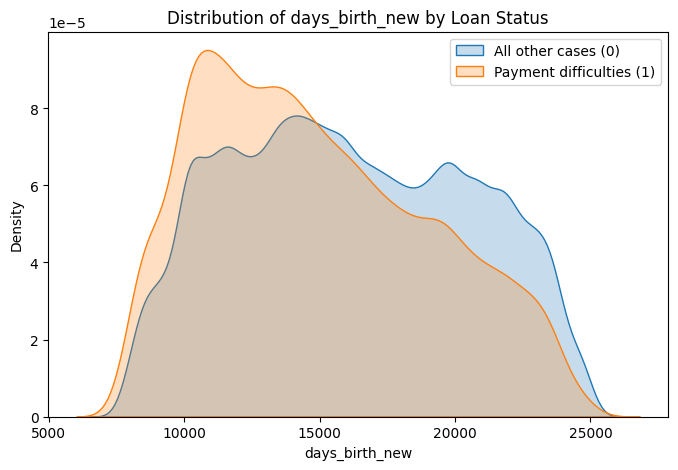

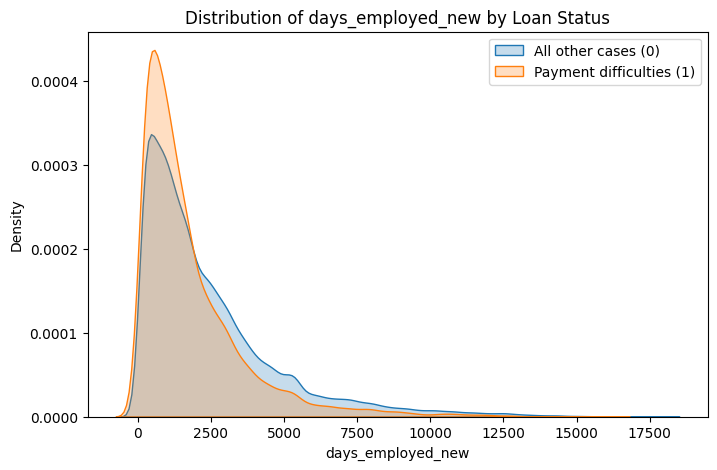

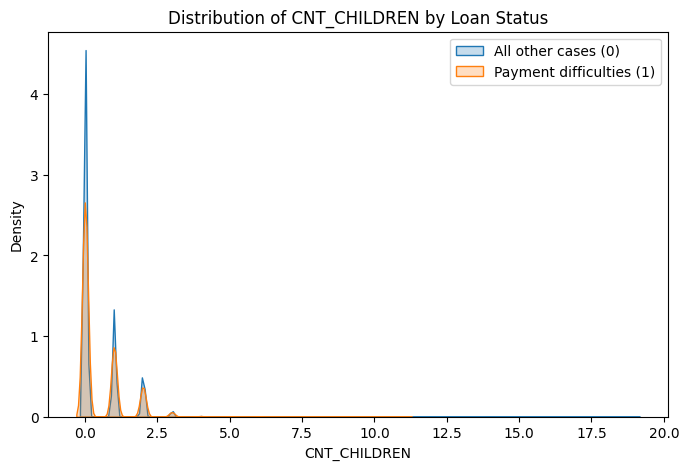

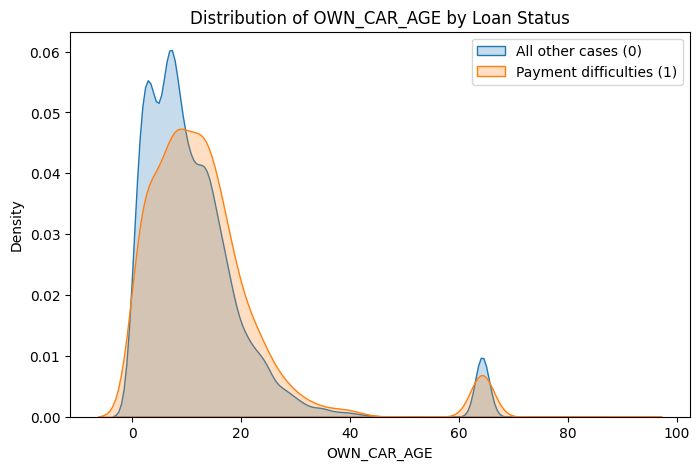

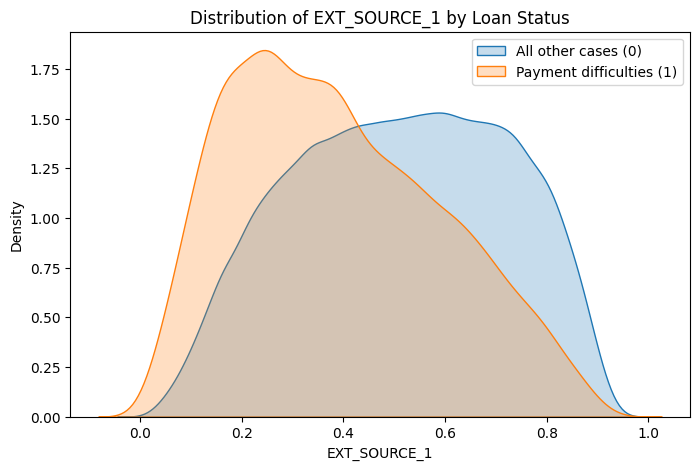

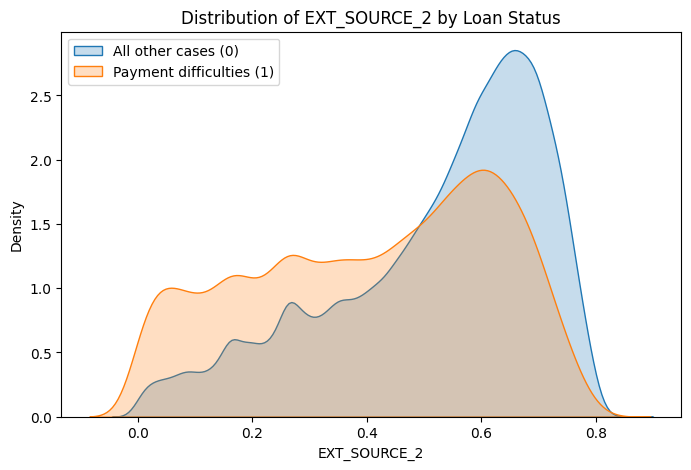

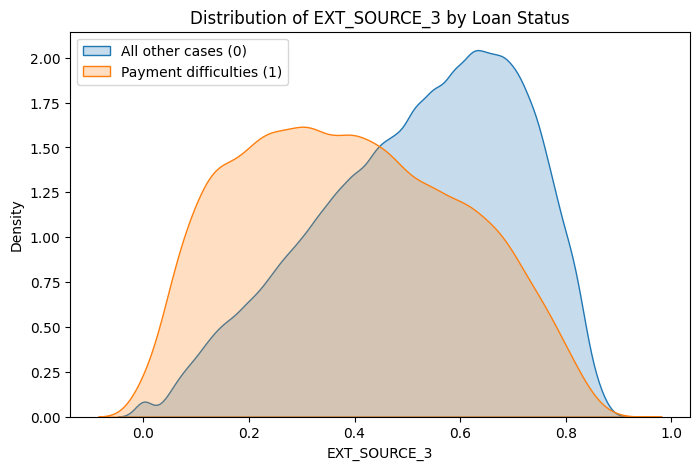

In [ ]:
def plot_customer_profile(df, features, target='TARGET'):
    for col in features:
        plt.figure(figsize=(8, 5))
        sns.kdeplot(df.loc[df[target]==0, col].dropna(), label='All other cases (0)', shade=True)
        sns.kdeplot(df.loc[df[target]==1, col].dropna(), label='Payment difficulties (1)', shade=True)
        plt.title(f'Distribution of {col} by Loan Status')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend()
        plt.show()
plot_customer_profile(curr, client_features)

Based on the KDE plots, clients with shorter employment durations, representing the unemployed and those in the early stages of their careers show a higher frequency of loan repayment difficulties compared to other employment groups. This pattern suggests that job instability and limited income consistency are key contributors to loan default risk.

Similarly, the age distribution indicates that younger clients tend to default more frequently than older clients, implying that financial experience and stability improve with age. Furthermore, clients with lower external credit scores exhibit a noticeably higher likelihood of default, reinforcing that credit score remains one of the most reliable indicators of repayment capacity.

Analysis of the client’s car age (OWN_CAR_AGE) shows that clients with newer cars tend to belong to the non-defaulting group, indicating stronger financial standing or more recent credit history. As car age increases beyond 10 years, the proportion of clients with loan repayment difficulties gradually rises, suggesting that older car ownership may be associated with weaker financial capacity or lower credit renewal activity.

Both groups show a declining trend as car age approaches 40 years, reflecting the scarcity of clients with very old vehicles. However, an anomaly is observed for cars reported as being over 60 years old, which is unrealistic and likely represents data recording or reporting errors. We will have a look at these anomalies in the next cell.


In [ ]:
# Basic summary
print("Summary statistics for OWN_CAR_AGE:")
print(curr.describe()['OWN_CAR_AGE'])

# Count extreme values
extreme_cars = curr[curr['OWN_CAR_AGE'] > 60]
print(f"\nNumber of clients with car age > 60 years: {len(extreme_cars)}")

# Optional: list a few extreme entries
print("\nSample of extreme cases (>60 years):")
print(extreme_cars[['SK_ID_CURR', 'OWN_CAR_AGE', 'TARGET']].head())

# Percentage out of whole dataset
percentage_extreme = len(extreme_cars) / len(curr) * 100
print("Percentage of anomaly:", percentage_extreme, "%")

Summary statistics for OWN_CAR_AGE:
count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

Number of clients with car age > 60 years: 3339

Sample of extreme cases (>60 years):
     SK_ID_CURR  OWN_CAR_AGE  TARGET
85       100100         65.0       0
134      100156         65.0       0
237      100275         64.0       0
272      100315         65.0       0
369      100425         64.0       0
Percentage of anomaly: 1.0858148163805523 %


Based on the analysis above, the maximum age of car is 91 years old, where 3339 clients recorded car age of more than 60 years. These are very unrealistic values and highly likely resulted from data entry error or encoding inconsistencies, rather than valid observations. These extreme cases shall be treated as anomalies and excluded from analysis. While it is insignificant where only 1.09% rows affected, but it is still a good practice to acknowledge these anomalies.

## Categorical Analysis

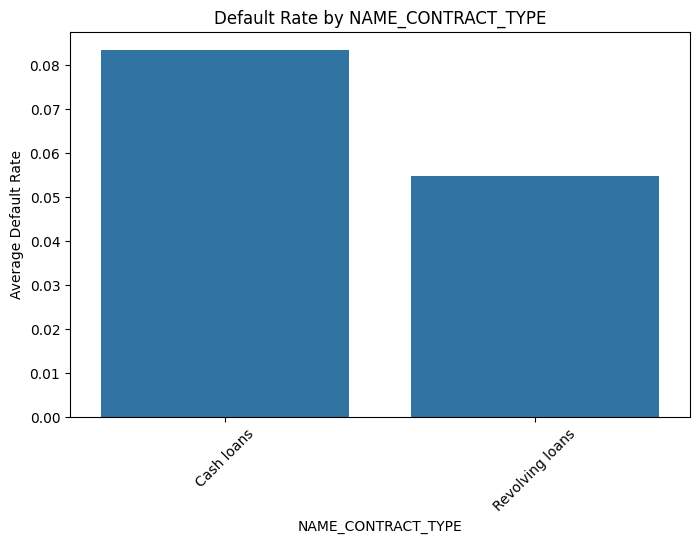

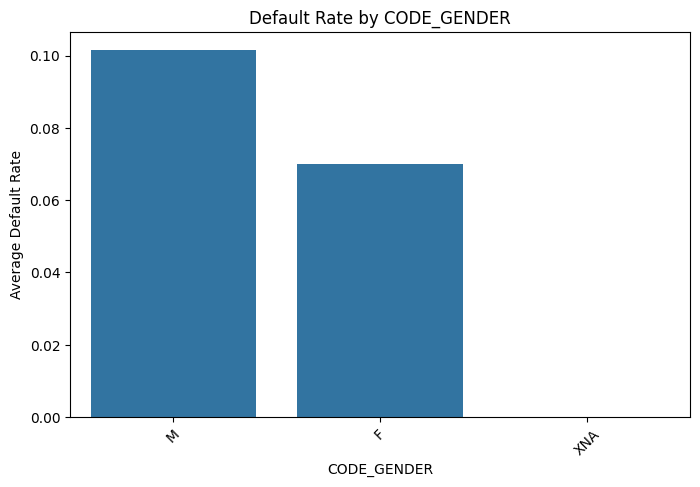

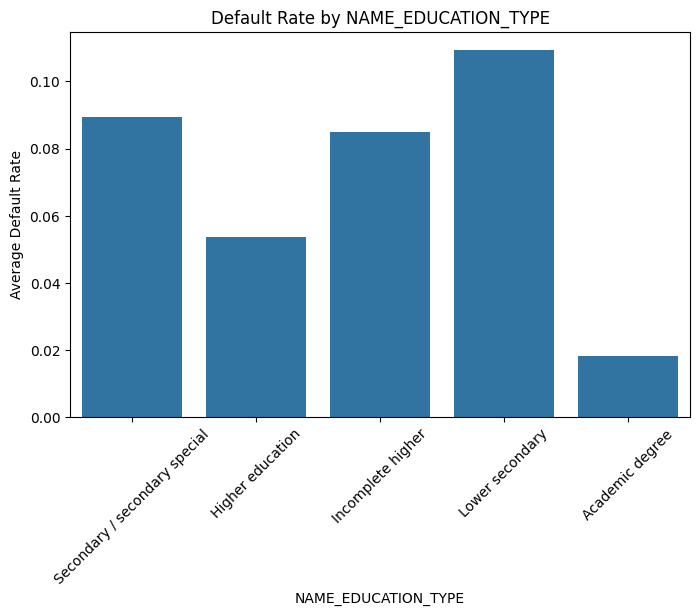

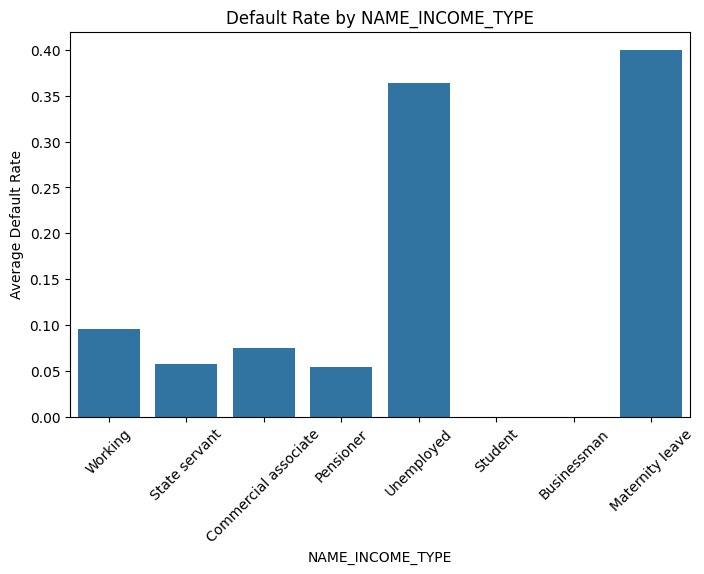

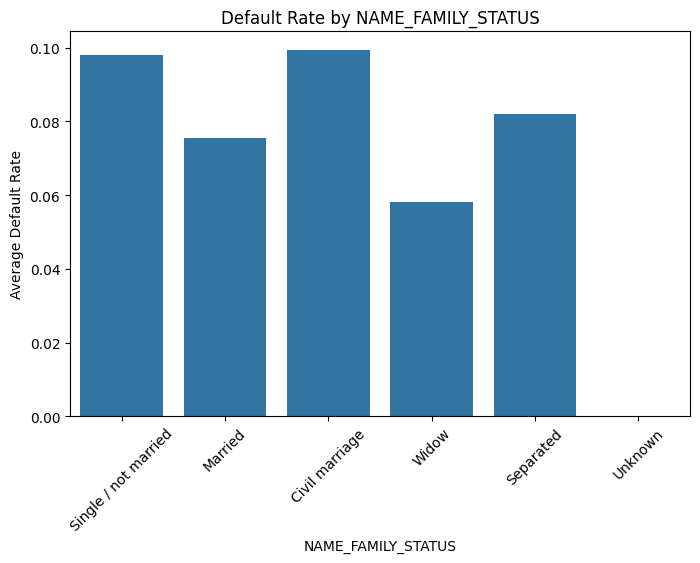

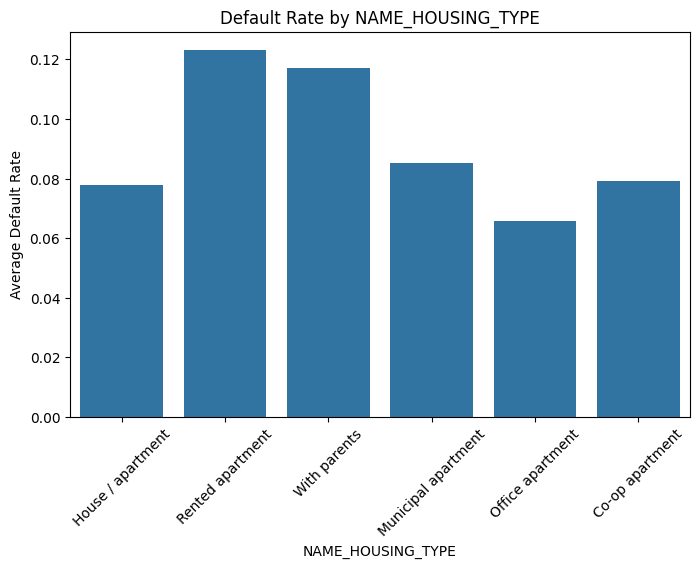

In [ ]:
def plot_categorical_features(df, features, target='TARGET'):
    for col in features:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=col, y=target, data=df, ci=None)
        plt.title(f'Default Rate by {col}')
        plt.ylabel('Average Default Rate')
        plt.xticks(rotation=45)
        plt.show()
plot_categorical_features(curr, categorical_features)


Based on the categorical analyses above, below are the findings for each category:

### Gender:
Male clients exhibit a higher rate of loan repayment difficulties compared to female clients, suggesting that female borrowers generally demonstrate more consistent repayment behavior.

### Contract Type:
Revolving loans show a higher tendency toward repayment difficulty compared to cash loans, indicating that clients with flexible credit arrangements may manage debt less effectively.

### Education Type:
Clients with lower secondary education have the highest rate of repayment difficulties, followed by those with secondary and incomplete higher education levels. This trend reinforces the positive relationship between education level and financial stability.

### Employment Type:
Clients on maternity leave show the highest repayment difficulties, followed by unemployed individuals. The rate drops significantly among working adults, emphasizing that employment status and income stability are critical in predicting default risk.

### Marital Status:
Single and civil-married clients show higher repayment difficulties compared to separated and married clients, while widowed individuals have the lowest default rate. This may indicate that joint financial responsibility and household stability contribute to better loan management.

### Housing Type:
Clients living in rented apartments display the highest rate of repayment difficulties, followed by those living with parents. In contrast, clients residing in office or owned apartments show the lowest likelihood of default, highlighting the role of housing stability and asset ownership in financial reliability.

## Ratio Analysis

In this part, we will check out the important ratios to measure relative metrics. Unlike absolute metrics, which provide a single, isolated number, relative metrics compare financial figures against other relevant variables to provide meaningful context. For individual loan applications, these ratios focus on the borrower's income and debt, which gives a clearer picture of their financial capacity and creditworthiness.

In [ ]:
# Building features

# Loan-to-Income Ratio
curr['CREDIT_INCOME_RATIO'] = curr['AMT_CREDIT'] / curr['AMT_INCOME_TOTAL']

# Annuity-to-Income Ratio (payment burden)
curr['ANNUITY_INCOME_RATIO'] = curr['AMT_ANNUITY'] / curr['AMT_INCOME_TOTAL']

# Credit-to-Goods Ratio (whether clients borrow more than item value)
curr['CREDIT_GOODS_RATIO'] = curr['AMT_CREDIT'] / curr['AMT_GOODS_PRICE']

# Credit-to-Annuity Ratio (approx. repayment term in years)
curr['CREDIT_ANNUITY_RATIO'] = curr['AMT_CREDIT'] / curr['AMT_ANNUITY']

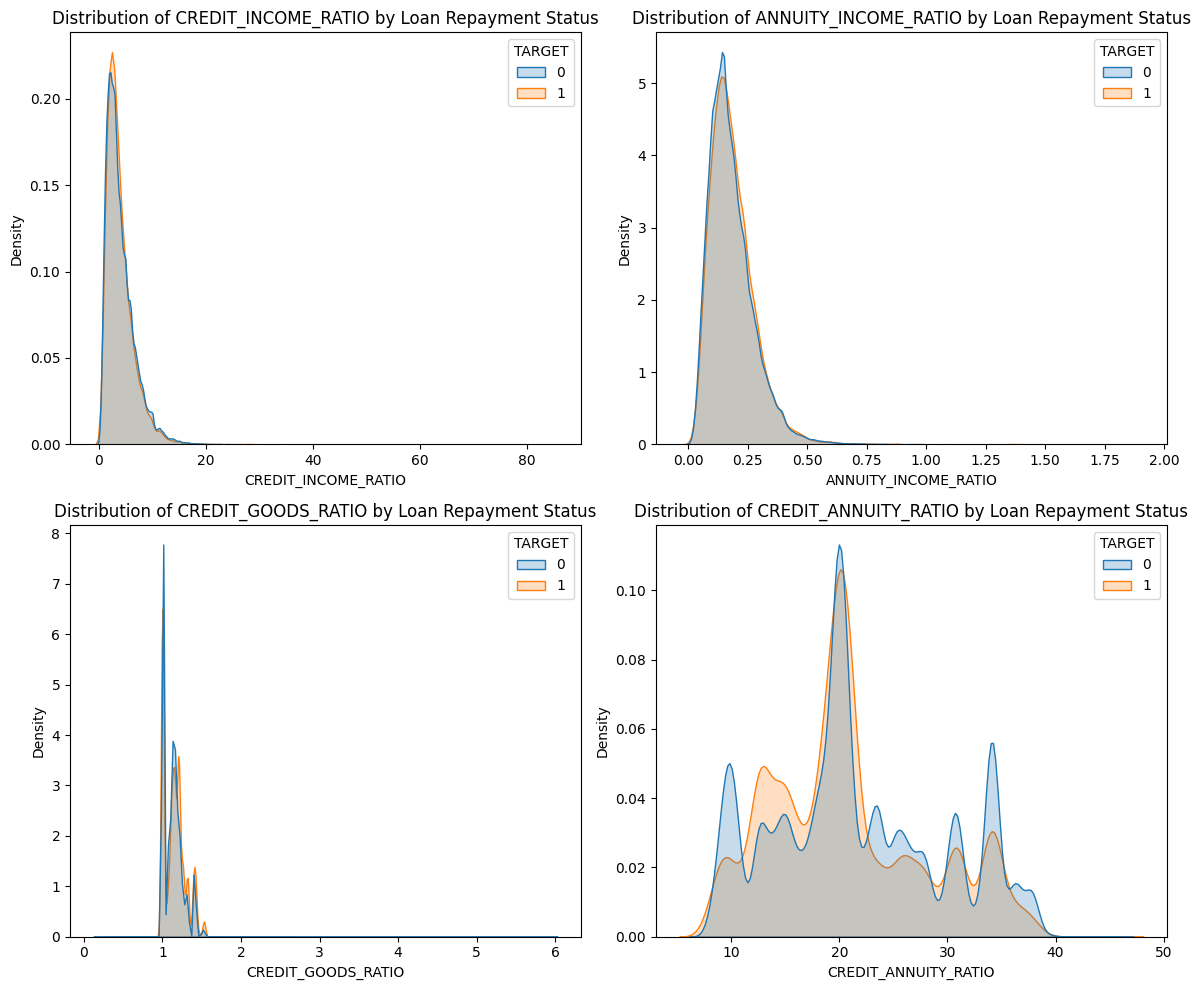

In [ ]:
ratio_cols = ['CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO',
              'CREDIT_GOODS_RATIO', 'CREDIT_ANNUITY_RATIO']

plt.figure(figsize=(12, 10))

for i, col in enumerate(ratio_cols, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=curr, x=col, hue='TARGET', common_norm=False, fill=True)
    plt.title(f'Distribution of {col} by Loan Repayment Status')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
ratio_summary = curr.groupby('TARGET')[ratio_cols].median().T
ratio_summary.columns = ['Non-Defaulters', 'Defaulters']
print(ratio_summary)

                      Non-Defaulters  Defaulters
CREDIT_INCOME_RATIO         3.266653    3.253143
ANNUITY_INCOME_RATIO        0.162280    0.169294
CREDIT_GOODS_RATIO          1.118800    1.145200
CREDIT_ANNUITY_RATIO       20.000000   20.000000


Using median values for ratio-based variables provides a more robust comparison between defaulters and non-defaulters by minimizing the effect of income or credit outliers. The results indicate that both groups have comparable loan-to-income ratios, suggesting that the absolute loan size relative to income may not be the primary driver of default.

However, defaulters exhibit a slightly higher annuity-to-income ratio, implying that a greater portion of their income is committed to periodic repayments, which can lead to higher financial stress. Similarly, the credit-to-goods ratio is marginally higher among defaulters, indicating a pattern of over-borrowing relative to asset value. The credit-to-annuity ratio remains constant at approximately 20 across both groups, suggesting that most clients share similar loan term structures.

Overall, the median analysis shows that default risk is more closely associated with repayment burden and borrowing behavior than with total loan or income levels. While each ratio individually provides insight into financial strain, combining two or more of these ratios, such as loan-to-income and annuity-to-income could yield a more reliable indicator of repayment difficulty. This combination would capture both the size of the debt and the borrower’s ongoing repayment pressure, providing a more holistic view of financial vulnerability.

# Past Behavior Analysis

In this section, we will have a look at previous client's behavior to see if current repayment difficulties are also reflected in their past loan behavior.


In [ ]:
prev.info()
prev['NAME_CONTRACT_STATUS'].value_counts(normalize=True) * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

,proportion
NAME_CONTRACT_STATUS,
Approved,62.074740
Canceled,18.938831
Refused,17.403638
Unused offer,1.582791


In [ ]:
pd.set_option('display.float_format', '{:.0f}'.format)
prev['AMT_CREDIT']

,AMT_CREDIT
0,17145
1,679671
2,136444
3,470790
4,404055
...,...
1670209,311400
1670210,64292
1670211,102524
1670212,191880


In [ ]:
# Merge previous application data and the current dataset
merged_df = curr.merge(prev, on='SK_ID_CURR', how='left')

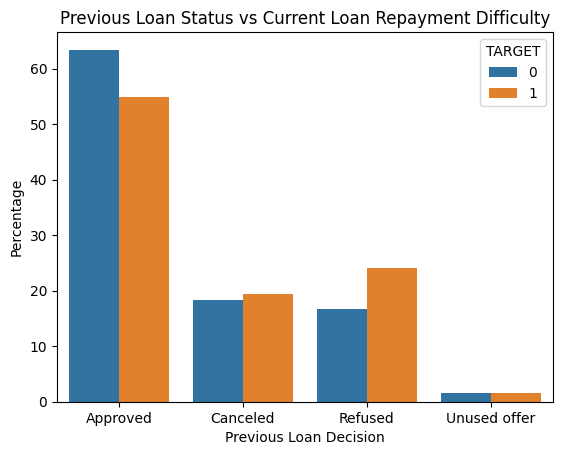

In [ ]:
status_pivot = (
    merged_df.groupby(['NAME_CONTRACT_STATUS', 'TARGET'])
    .size()
    .reset_index(name='count')
)
status_pivot['percentage'] = (
    status_pivot['count'] / status_pivot.groupby('TARGET')['count'].transform('sum') * 100
)

sns.barplot(
    data=status_pivot,
    x='NAME_CONTRACT_STATUS',
    y='percentage',
    hue='TARGET'
)
plt.title('Previous Loan Status vs Current Loan Repayment Difficulty')
plt.ylabel('Percentage')
plt.xlabel('Previous Loan Decision')
plt.show()


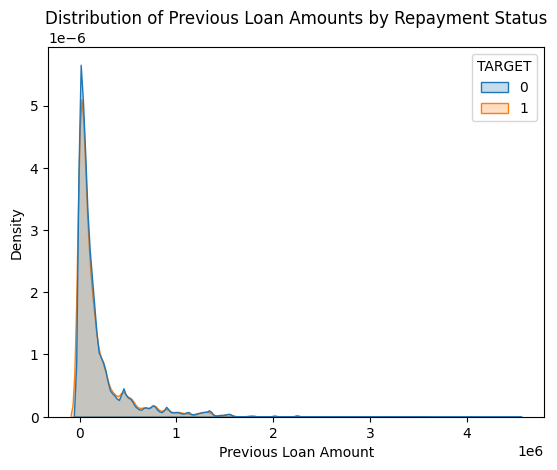

In [ ]:
sns.kdeplot(
    data=merged_df,
    x='AMT_CREDIT_y',
    hue='TARGET',
    common_norm=False,
    fill=True
)
plt.title('Distribution of Previous Loan Amounts by Repayment Status')
plt.xlabel('Previous Loan Amount')
plt.show()

In [ ]:
# Summarize previous application behavior for each client
prev_summary = (
    prev.groupby('SK_ID_CURR')
        .agg({
            'AMT_CREDIT': ['mean', 'max', 'count'],
            'NAME_CONTRACT_STATUS': lambda x: x.value_counts().index[0]  # most common status
        })
)

# Clean column names
prev_summary.columns = ['PREV_CREDIT_MEAN', 'PREV_CREDIT_MAX', 'PREV_NUM_APPLICATIONS', 'PREV_MOST_FREQ_STATUS']
prev_summary.reset_index(inplace=True)

# Merge with current application data
merged_summary = curr.merge(prev_summary, on='SK_ID_CURR', how='left')


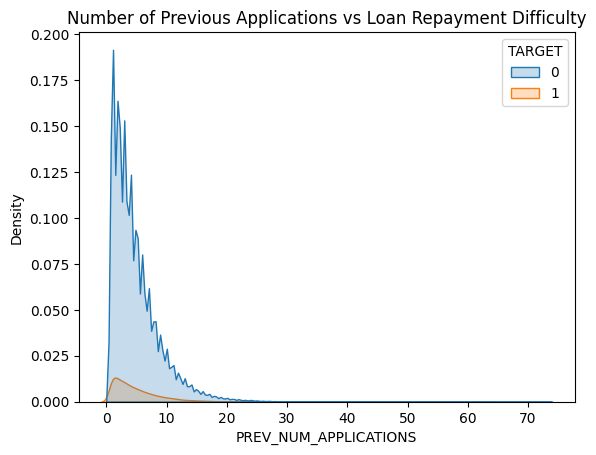

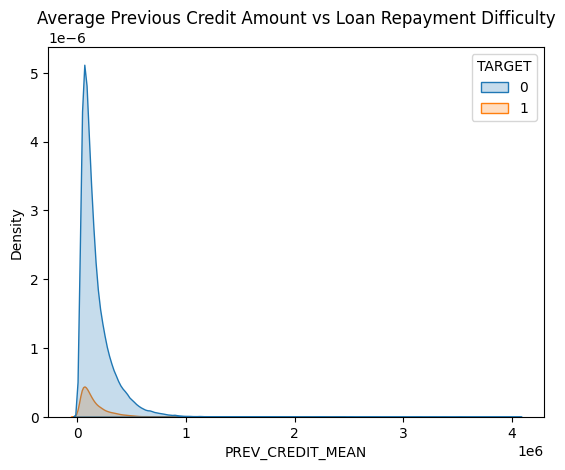

In [ ]:
# Compare number of previous applications by TARGET
sns.kdeplot(data=merged_summary, x='PREV_NUM_APPLICATIONS', hue='TARGET', fill=True)
plt.title('Number of Previous Applications vs Loan Repayment Difficulty')
plt.show()

# Compare previous credit mean by TARGET
sns.kdeplot(data=merged_summary, x='PREV_CREDIT_MEAN', hue='TARGET', fill=True)
plt.title('Average Previous Credit Amount vs Loan Repayment Difficulty')
plt.show()



In [ ]:
# Bin number of previous applications
merged_summary['PREV_NUM_BIN'] = pd.cut(
    merged_summary['PREV_NUM_APPLICATIONS'],
    bins=[0, 2, 5, 10, 20, 50, merged_summary['PREV_NUM_APPLICATIONS'].max()],
    labels=['1–2', '3–5', '6–10', '11–20', '21–50', '50+']
)

# Bin average previous credit amount
merged_summary['PREV_CREDIT_MEAN_BIN'] = pd.cut(
    merged_summary['PREV_CREDIT_MEAN'],
    bins=[0, 1e5, 2e5, 5e5, 1e6, 2e6, merged_summary['PREV_CREDIT_MEAN'].max()],
    labels=['<100k', '100–200k', '200–500k', '500k–1M', '1M–2M', '2M+']
)


In [ ]:
def default_rate_by_bin(df, bin_col):
    rate = (
        df.groupby(bin_col)['TARGET']
        .value_counts(normalize=True)
        .rename('percentage')
        .mul(100)
        .reset_index()
    )
    return rate[rate['TARGET'] == 1]  # focus only on defaulters

default_rate_numapps = default_rate_by_bin(merged_summary, 'PREV_NUM_BIN')
default_rate_credit = default_rate_by_bin(merged_summary, 'PREV_CREDIT_MEAN_BIN')


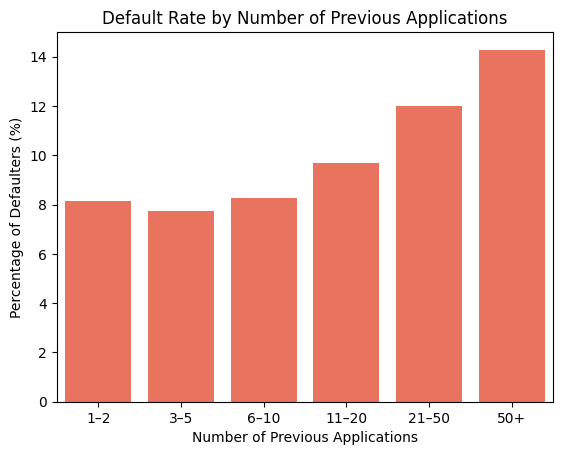

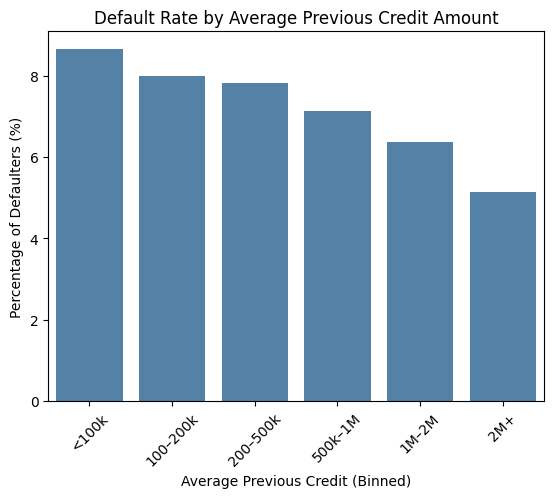

In [ ]:
# Number of previous applications vs default rate
sns.barplot(
    data=default_rate_numapps,
    x='PREV_NUM_BIN', y='percentage',
    color='tomato'
)
plt.title('Default Rate by Number of Previous Applications')
plt.ylabel('Percentage of Defaulters (%)')
plt.xlabel('Number of Previous Applications')
plt.show()

# Average previous credit amount vs default rate
sns.barplot(
    data=default_rate_credit,
    x='PREV_CREDIT_MEAN_BIN', y='percentage',
    color='steelblue'
)
plt.title('Default Rate by Average Previous Credit Amount')
plt.ylabel('Percentage of Defaulters (%)')
plt.xlabel('Average Previous Credit (Binned)')
plt.xticks(rotation=45)
plt.show()


Contrary to expectations, the analysis of previous loan applications revealed minimal differences in the distribution of past loan amounts and application counts between clients with repayment difficulties and those without, suggesting that borrowing volume alone is not a strong indicator of current loan performance.

However, when examining percentage default rates across binned categories, clearer behavioral distinctions emerged. Clients with 21–50 and 50+ previous applications exhibited the highest default percentages, indicating that frequent reapplications may reflect financial instability or excessive credit dependence. Similarly, clients whose average previous credit amount was below $100k showed a higher tendency to default, suggesting that lower-value or short-term loans may be associated with higher risk profiles.

In addition, clients with a greater share of “Cancelled” and “Refused” past applications were more likely to face repayment difficulties in their current loans, while those with a consistent record of “Approved” applications demonstrated stronger repayment behavior.

Overall, the percentage-based analysis highlights that historical borrowing outcomes and patterns (such as loan frequency, refusal history, and credit amount range) provide more meaningful insight into current credit risk than total borrowing volume alone.

# Recommended Actions

Based on the insights from the exploratory data analysis, the following actions are recommended to improve credit risk management and lending decisions:

1. **Enhance Risk Assessment Criteria**
   - Integrate behavioral indicators such as past refusals, cancellations, and frequent reapplications into credit scoring.
   - Place higher scrutiny on applicants with multiple loan histories or low-value past loans, as these trends suggest financial instability.

2. **Refine Loan Approval Policies**
   - Implement tiered risk thresholds based on key financial ratios (e.g., annuity-to-income) and demographic factors (e.g., employment stability, age group).
   - Offer smaller or shorter-term loans with stricter monitoring for high-risk applicants instead of outright rejections.

3. **Targeted Financial Counseling**
   - Develop financial literacy programs for younger and early-career clients, focusing on debt management and responsible credit use.
   - Engage clients with unstable employment in budgeting or savings support programs to improve repayment consistency.

4. **Portfolio Monitoring and Early Warning Systems**
   - Build a dashboard that continuously tracks repayment ratios, loan age, and client demographics to flag rising risk segments.
   - Use trend-based triggers (e.g., declining income or repeated applications) to intervene before defaults occur.

5. **Data-Driven Policy Development**
   - Leverage findings to inform credit scoring model updates or machine learning models that quantify default probability.
   - Periodically revalidate key risk indicators as market and borrower behavior evolve.

Together, these actions aim to balance profitability with financial prudence, thus ensuring that capable clients are approved while minimizing exposure to potential defaults.

# Conclusion

This exploratory data analysis provided a comprehensive view of the factors influencing loan repayment difficulties among bank clients. Through systematic data cleaning, outlier handling, and feature selection, the dataset was refined to focus on meaningful client and loan characteristics.

Analysis of demographic and socioeconomic features revealed that younger clients, those with unstable employment, and lower education levels were more prone to repayment difficulties. This indicates that financial maturity and employment stability play a crucial role in credit reliability. Gender and marital status also contributed to risk differentiation, with males and single or civil-married clients showing slightly higher default tendencies.

Financial ratio analysis highlighted that repayment burden relative to income (annuity-to-income ratio) and over-borrowing relative to asset value (credit-to-goods ratio) were stronger indicators of default risk than total loan or income alone. These findings suggest that clients experiencing higher financial stress — regardless of income level — are more likely to face payment challenges.

When examining historical loan behavior, the overall number and amount of previous applications showed limited predictive value on their own. However, percentage-based analysis revealed that clients with higher prior applications and those whose previous credit amount was lower than average recorded higher default rates. Additionally, clients with a greater share of refused or cancelled past applications were more likely to default on their current loans. These patterns suggest that frequent reapplications, low-value credit histories, and prior borrowing irregularities may signal underlying financial instability and reduced credit reliability.


Overall, the EDA indicates that credit risk is multifactorial, driven by a combination of demographic, financial, and behavioral elements. While this analysis stops short of predictive modeling, it establishes a strong foundation for future credit risk assessment, enabling the bank to design more informed lending strategies, such as stricter approval criteria for high-risk profiles, targeted financial education, or differentiated loan terms based on risk exposure.

# Future Improvements

While the exploratory analysis provided strong insights into loan default behavior, several steps can be taken to enhance the analysis and prepare for more advanced modeling and support the recommended actions above:

1. **Data Enrichment**
   - Incorporate additional data sources such as credit bureau information, transaction history, or macroeconomic indicators to improve predictive context.
   - Capture client income trends and employment stability over time to strengthen financial behavior insights.

2. **Advanced Analysis / Modeling**
   - Transition from EDA to predictive modeling (e.g., logistic regression, random forest) to estimate default probabilities.
   - Perform feature selection and multicollinearity checks to validate key predictors of loan risk.

3. **Data Quality Enhancement**
   - Use domain-driven imputation instead of dropping missing values to retain more information.
   - Standardize categorical and flag columns to ensure cleaner, more interpretable data for modeling.

4. **Behavioral & Portfolio Analysis**
   - Segment clients by loan type or risk profile to identify high-risk categories for proactive intervention.

5. **Business Integration**
   - Translate findings into actionable policy recommendations—such as stricter screening for repeat applicants or those with frequent past refusals.
   - Develop a Power BI or Tableau dashboard for continuous loan performance monitoring.
